# Clasificación de cancer con una red neuronal

En este notebook se va a desarrollar la implementación de una red neuronal de 3 capas, con 9 entredas, 15 neuronas en la capa oculta y una neurona con funcion de salida sigmoide en la última capa. El objetivo es determinar, partiendo de un csv, la naturaleza de los tumores en funcion de sus características.
Para el mejor entendimiento del ejercicio, el notebook se separa en dos secciones:
- Preparación de los datos.
- Instanciación de la red neuronal (desarrollada en NeuronalNetwork.py) y uso con los parámetros más óptimos encontrados.

## Preparación de los datos

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import mean_squared_error 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import seaborn as sns
from NeuronalNetwork import *

### Load and format data

El dataset viene con la salida defindia como 2 ó 4, la cambiamos a 0 ó 1 para poder trabajar. También se eliminan aquellas filas con algún valor nulo. <br> Las entradas de la red neuronal corresponderán a: 
- Clump Thickness
- Uniformity of Cell Size
- Uniformity of Cell Shape
- Marginal Adhesion
- Single Epithelial Cell Size
- Bare Nuclei
- Bland Chromatin
- Normal Nucleoli 
- Mitoses

In [2]:
#load and format data
df = pd.read_csv('wisconsin-cancer-dataset.csv',header=None)
df.head(5)
df.iloc[:,10].replace(2, 0,inplace=True)
df.iloc[:,10].replace(4, 1,inplace=True)
df = df[~df[6].isin(['?'])]
df = df.astype(float)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0.0
1,1002945.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0.0
2,1015425.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0.0
3,1016277.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0.0
4,1017023.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0.0


### Feature Normalization

Se normaliza las características para acotarlas todas en un intervalo entre 0 y 1, con el objetivo de que ninguna de ellas condicione en exceso el ejercicio o pase desapercibida. Se muestran los valores de las características. Para el desarrollo del ejercicio solo nos interesan las características del 1 al 9.

In [3]:
names = df.columns[0:10]
scaler = MinMaxScaler() 
scaled_df = scaler.fit_transform(df.iloc[:,0:10]) 
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df[10]= df[10]
#scaled_df.iloc[0:13,1:11].plot.bar();
#scaled_df.iloc[0:13,1:11].plot.hist(alpha=0.5)

### Creation of train and validation sets

Para la posterior evalucaión de la clasificación, creamos un set de entrenamiento y otro menor de validación.

In [4]:
x=scaled_df.iloc[0:500,1:10].values.transpose()
y=df.iloc[0:500,10:].values.transpose()
xval=scaled_df.iloc[501:683,1:10].values.transpose()
yval=df.iloc[501:683,10:].values.transpose()

## Netwotk Development

### Declaring nn

Declaramos la red neuronal con los valores de entrenamiento y un learning rate de 0.02. La red funciona con una arquitectura [9 - 15 - 1], la cual utiliza funciones de salida lineales en la capa intermedia y una sigmoidal en la de salida. Utiliza como función de error, en lugar del clásico MSE, el Cross-Entropy. 
El algortimo de aprendizaje utilizado es el descenso por gradiente, el cual implementa el algoritmo de backpropagation.

Cost after iteration 0: 0.257234
Cost after iteration 100: 0.214475
Cost after iteration 200: 0.182112
Cost after iteration 300: 0.157673
Cost after iteration 400: 0.138460
Cost after iteration 500: 0.122704
Cost after iteration 600: 0.109399
Cost after iteration 700: 0.097997
Cost after iteration 800: 0.088188
Cost after iteration 900: 0.079769
Cost after iteration 1000: 0.072575
Cost after iteration 1100: 0.066458
Cost after iteration 1200: 0.061276
Cost after iteration 1300: 0.056900
Cost after iteration 1400: 0.053212
Cost after iteration 1500: 0.050106
Cost after iteration 1600: 0.047491
Cost after iteration 1700: 0.045289
Cost after iteration 1800: 0.043431
Cost after iteration 1900: 0.041862
Cost after iteration 2000: 0.040532
Cost after iteration 2100: 0.039400
Cost after iteration 2200: 0.038433
Cost after iteration 2300: 0.037603
Cost after iteration 2400: 0.036886
Cost after iteration 2500: 0.036263
Cost after iteration 2600: 0.035718
Cost after iteration 2700: 0.035238
Cost

Cost after iteration 24300: 0.029523
Cost after iteration 24400: 0.029510
Cost after iteration 24500: 0.029495
Cost after iteration 24600: 0.029481
Cost after iteration 24700: 0.029465
Cost after iteration 24800: 0.029450
Cost after iteration 24900: 0.029434
Cost after iteration 25000: 0.029418
Cost after iteration 25100: 0.029402
Cost after iteration 25200: 0.029386
Cost after iteration 25300: 0.029369
Cost after iteration 25400: 0.029352
Cost after iteration 25500: 0.029335
Cost after iteration 25600: 0.029317
Cost after iteration 25700: 0.029300
Cost after iteration 25800: 0.029282
Cost after iteration 25900: 0.029265
Cost after iteration 26000: 0.029247
Cost after iteration 26100: 0.029229
Cost after iteration 26200: 0.029211
Cost after iteration 26300: 0.029193
Cost after iteration 26400: 0.029175
Cost after iteration 26500: 0.029157
Cost after iteration 26600: 0.029139
Cost after iteration 26700: 0.029120
Cost after iteration 26800: 0.029102
Cost after iteration 26900: 0.029084
C

Cost after iteration 47800: 0.027909
Cost after iteration 47900: 0.027909
Cost after iteration 48000: 0.027909
Cost after iteration 48100: 0.027908
Cost after iteration 48200: 0.027908
Cost after iteration 48300: 0.027907
Cost after iteration 48400: 0.027907
Cost after iteration 48500: 0.027907
Cost after iteration 48600: 0.027906
Cost after iteration 48700: 0.027906
Cost after iteration 48800: 0.027905
Cost after iteration 48900: 0.027905
Cost after iteration 49000: 0.027905
Cost after iteration 49100: 0.027904
Cost after iteration 49200: 0.027904
Cost after iteration 49300: 0.027904
Cost after iteration 49400: 0.027903
Cost after iteration 49500: 0.027903
Cost after iteration 49600: 0.027903
Cost after iteration 49700: 0.027902
Cost after iteration 49800: 0.027902
Cost after iteration 49900: 0.027902


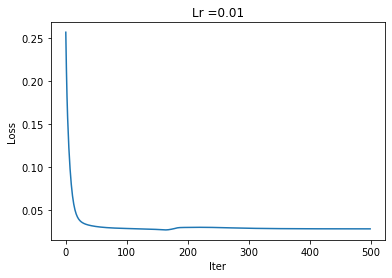

In [5]:
nn = NeuronalNetwork(x,y,0.01,0)
nn.gradient_descent(50000)

### Predict and comparing training acurrancy vs validation acurrancy

Comparamos el acierto desempeñado por nuestra red neuronal, tanto en el test de entrenamiento como en el de validación. Se prefiere un mejor resultado en el de validación que en el de entrenamiento, ya que esto es signo de que, a priori, no existe ningún tipo de problema de vias o de variance.

In [6]:
pred_train = nn.predict(x, y)
pred_test = nn.predict(xval, yval)

Acc: 0.9240000000000003
Acc: 0.9835164835164836


### Function to plot the performance of the nn (skewed classes)

In [7]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('0         Predicted         1')
    plt.ylabel('1          Actual            0')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(np.ndarray([0,1]))
    plt.yticks(np.ndarray([0,1]))
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] > (cf.max()*0.7) else 'black')
    plt.show();


### Check how well it predict!

Dado los buenos resultados obtenidos, se procede a hacer la predicción, tanto con los datos de entrenamiento como con los de validación. 

Acc: 0.9240000000000003


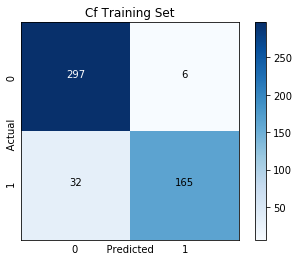

Acc: 0.9835164835164836


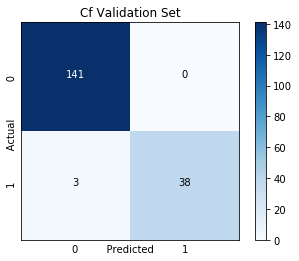

In [8]:
nn.threshold=0.90#0.85
nn.X,nn.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nn.X,nn.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nn.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')

## Regularized

Cost after iteration 0: 0.257234
Cost after iteration 100: 0.214368
Cost after iteration 200: 0.181792
Cost after iteration 300: 0.157165
Cost after iteration 400: 0.137801
Cost after iteration 500: 0.121914
Cost after iteration 600: 0.108492
Cost after iteration 700: 0.096992
Cost after iteration 800: 0.087109
Cost after iteration 900: 0.078645
Cost after iteration 1000: 0.071435
Cost after iteration 1100: 0.065327
Cost after iteration 1200: 0.060175
Cost after iteration 1300: 0.055846
Cost after iteration 1400: 0.052216
Cost after iteration 1500: 0.049177
Cost after iteration 1600: 0.046635
Cost after iteration 1700: 0.044506
Cost after iteration 1800: 0.042722
Cost after iteration 1900: 0.041223
Cost after iteration 2000: 0.039959
Cost after iteration 2100: 0.038890
Cost after iteration 2200: 0.037980
Cost after iteration 2300: 0.037202
Cost after iteration 2400: 0.036533
Cost after iteration 2500: 0.035952
Cost after iteration 2600: 0.035445
Cost after iteration 2700: 0.034998
Cost

Cost after iteration 23100: 0.028198
Cost after iteration 23200: 0.028187
Cost after iteration 23300: 0.028176
Cost after iteration 23400: 0.028165
Cost after iteration 23500: 0.028155
Cost after iteration 23600: 0.028144
Cost after iteration 23700: 0.028135
Cost after iteration 23800: 0.028125
Cost after iteration 23900: 0.028116
Cost after iteration 24000: 0.028107
Cost after iteration 24100: 0.028098
Cost after iteration 24200: 0.028090
Cost after iteration 24300: 0.028082
Cost after iteration 24400: 0.028074
Cost after iteration 24500: 0.028066
Cost after iteration 24600: 0.028059
Cost after iteration 24700: 0.028052
Cost after iteration 24800: 0.028045
Cost after iteration 24900: 0.028039
Cost after iteration 25000: 0.028033
Cost after iteration 25100: 0.028027
Cost after iteration 25200: 0.028021
Cost after iteration 25300: 0.028016
Cost after iteration 25400: 0.028011
Cost after iteration 25500: 0.028006
Cost after iteration 25600: 0.028001
Cost after iteration 25700: 0.027997
C

Cost after iteration 45500: 0.028676
Cost after iteration 45600: 0.028681
Cost after iteration 45700: 0.028687
Cost after iteration 45800: 0.028692
Cost after iteration 45900: 0.028697
Cost after iteration 46000: 0.028703
Cost after iteration 46100: 0.028708
Cost after iteration 46200: 0.028714
Cost after iteration 46300: 0.028719
Cost after iteration 46400: 0.028724
Cost after iteration 46500: 0.028730
Cost after iteration 46600: 0.028735
Cost after iteration 46700: 0.028741
Cost after iteration 46800: 0.028746
Cost after iteration 46900: 0.028751
Cost after iteration 47000: 0.028757
Cost after iteration 47100: 0.028762
Cost after iteration 47200: 0.028768
Cost after iteration 47300: 0.028773
Cost after iteration 47400: 0.028779
Cost after iteration 47500: 0.028784
Cost after iteration 47600: 0.028789
Cost after iteration 47700: 0.028795
Cost after iteration 47800: 0.028800
Cost after iteration 47900: 0.028806
Cost after iteration 48000: 0.028811
Cost after iteration 48100: 0.028817
C

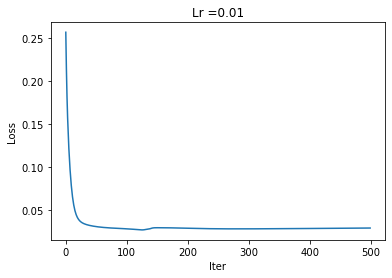

In [9]:
nnr = NeuronalNetwork(x,y,0.01,0.95)
nnr.gradient_descent_regu(50000)

In [10]:
pred_train = nnr.predict(x, y)
pred_test = nnr.predict(xval, yval)

Acc: 0.9360000000000003
Acc: 1.0


Acc: 0.9360000000000003


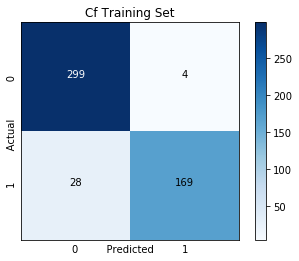

Acc: 1.0


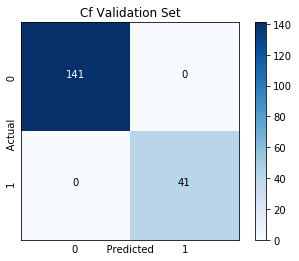

In [11]:
nnr.threshold=0.90#0.85
nnr.X,nnr.Y=x, y 
target=np.around(np.squeeze(y), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nnr.predict(x,y)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Training Set')

nnr.X,nnr.Y=xval, yval 
target=np.around(np.squeeze(yval), decimals=0).astype(np.int)
predicted=np.around(np.squeeze(nnr.predict(xval,yval)), decimals=0).astype(np.int)
plotCf(target,predicted,'Cf Validation Set')

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression(fit_intercept=False)
logistic_regression.fit(x.T,(y.T).reshape(500, ))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
def plotCf(a,b,t):
    cf =confusion_matrix(a,b)
    plt.imshow(cf,cmap=plt.cm.Blues,interpolation='nearest')
    plt.colorbar()
    plt.title(t)
    plt.xlabel('0         Predicted         1')
    plt.ylabel('1          Actual            0')
    tick_marks = np.arange(len(set(a))) # length of classes
    class_labels = ['0','1']
    plt.xticks(np.ndarray([0,1]))
    plt.yticks(np.ndarray([0,1]))
    print('Acc:',(cf[0,0]+cf[1,1])/a.shape[0])
    for i,j in itertools.product(range(cf.shape[0]),range(cf.shape[1])):
        plt.text(j,i,format(cf[i,j],'d'),horizontalalignment='center',color='white' if cf[i,j] > (cf.max()*0.7) else 'black')
    plt.show();

In [14]:
threshold = 0.9
y_pred = np.where(logistic_regression.predict_proba(x.T)[:,1] > threshold, 1, 0)

Acc: 0.854


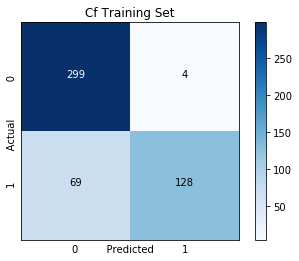

In [15]:
plotCf(y.reshape(500, ),y_pred,'Cf Training Set')

In [16]:
threshold = 0.9
y_pred = np.where(logistic_regression.predict_proba(xval.T)[:,1] > threshold, 1, 0)

Acc: 0.9175824175824175


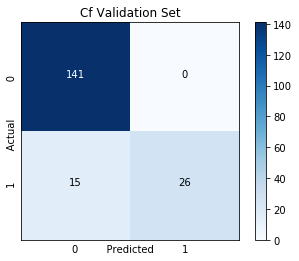

In [17]:
plotCf(yval.reshape(182, ),y_pred,'Cf Validation Set')